In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

In [ ]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
data.shape

(8807, 12)

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#DATA CLEANING & TRANSFORMATION

 `

In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


As we can see some of the columns like director, cast, country are null. We will remove these null values.

In [ ]:
data=data.dropna()

Now, we will check for the duplicate values

In [ ]:
data.duplicated().sum()

0

Now, we will check for the total unique values in each columns

In [ ]:
data.nunique()

,0
show_id,5332
type,2
title,5332
director,3945
cast,5200
country,604
date_added,1453
release_year,72
rating,14
duration,198


We will make a copy of the dataset, in which we will work further

In [ ]:
df=data.copy()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Now we will convert the date fields into date, day, month and year for further analysis

In [ ]:
df['date_added'] = df['date_added'].str.strip(' ')  # We are using strip, to remove the extra white spaces in the date field, otherwise it will throw error during conversion
df.date_added=pd.to_datetime(df['date_added'], format='%B %d, %Y') # We are using format='%B %d, %Y' as the dates are in format Month, day, year- September 21, 2021
df.year_added=df['date_added'].dt.year # Extract year
df.month_added=df['date_added'].dt.month # Extract month
df.month_name_added=df['date_added'].dt.month_name # Extract month name
df.day_added=df['date_added'].dt.day # Extract day
df.day_name_added=df['date_added'].dt.day_name # Extract day name
df.date_added=df['date_added'].dt.strftime('%d-%m-%Y') # We are using strftime to convert YYYY-MM-DD to DD-MM-YYYY format

<ipython-input-48-03b5888d5b63>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year_added=df['date_added'].dt.year # Extract year
<ipython-input-48-03b5888d5b63>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.month_added=df['date_added'].dt.month # Extract month
<ipython-input-48-03b5888d5b63>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.day_added=df['date_added'].dt.day # Extract day


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-09-2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-09-2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,24-09-2021,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",23-09-2021,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,21-09-2021,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


We are creating two seperate dataframes for both Movies and TV Shows

In [ ]:
df_movies=df[df.type=='Movie']
df_shows=df[df.type=='TV Show']

# DATA VISUALISATION

Lets Visualise the percentage of Netflix movies and TV shows

In [ ]:
labels=['Movie', 'TV Show']
df[['type']].groupby(by=df.type).count()

,type
type,
Movie,5185
TV Show,147


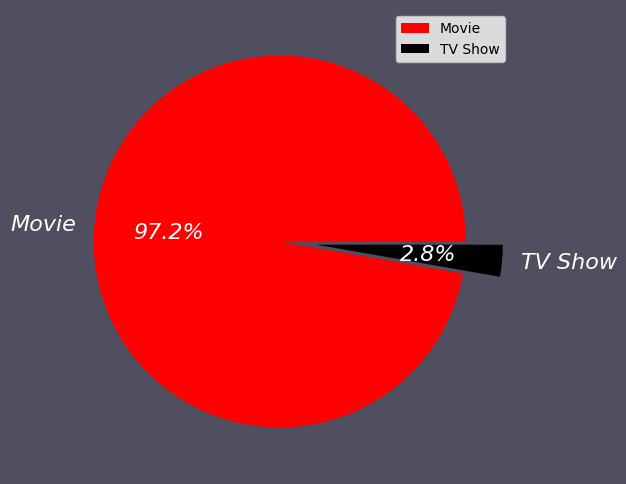

In [ ]:
size=df.type.value_counts()
explode=[0,0.2]
fig=plt.figure(figsize=(6,8))
fig.patch.set_facecolor('#4F4F60')
ax=plt.axes()
ax.set_facecolor('black')
plt.pie(size, labels=labels, explode=explode, autopct='%1.1f%%', colors=['red', 'black'], textprops={'fontsize': 16, 'color': 'white', 'style':'oblique'}) # We are using autopct to get the percentage value
# We are using labels and print labels and explode for the gap between each pie.
plt.legend()
plt.show()

As we can see theres only 2.8% TV shows are there on Netflix whereas 97.2% are movies.

Now, lets visualise the top 10 countries producing Netflix contents

In [ ]:
top_countries=df.country.value_counts().head(10)
top_countries

,count
country,
United States,1846
India,875
United Kingdom,183
Canada,107
Spain,91
Egypt,90
Nigeria,88
Japan,83
Turkey,79


In [ ]:
top_countries_perc=np.array([str(i)+'%' for i in  np.round(top_countries.values/len(df)*100,2)])
top_countries_perc

array(['34.62%', '16.41%', '3.43%', '2.01%', '1.71%', '1.69%', '1.65%',
       '1.56%', '1.48%', '1.43%'], dtype='<U6')

In [ ]:
#A function to add values on the centeral top of each bar of the bar chart
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, x[i], y[i], ha = 'center', color='#E7E7E7', fontsize=10, fontweight='bold')

<ipython-input-56-c5490b6f870d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette=['#CC0314','#CC0314','#D10314','#D10314','#990411','#990411','#74020C','#74020C', '#60020A','#60020A'])


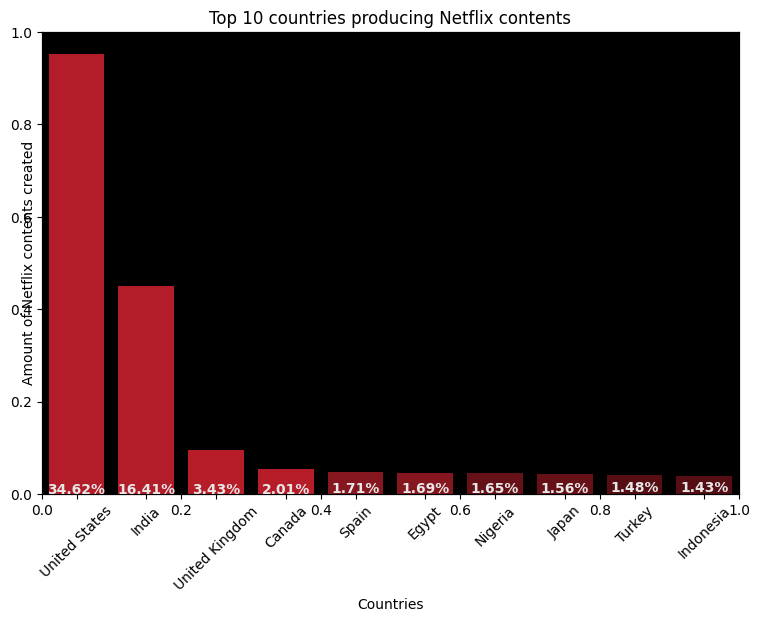

In [ ]:
top_countries=df.country.value_counts().head(10)
plt.figure(figsize=(9,6))
plt.title("Top 10 countries producing Netflix contents")
ax=plt.axes()
ax.set_facecolor('black')
sns.barplot(x=top_countries.index, y=top_countries.values, palette=['#CC0314','#CC0314','#D10314','#D10314','#990411','#990411','#74020C','#74020C', '#60020A','#60020A'])
plt.xticks(rotation=45)
plt.yticks([])
plt.xlabel("Countries")
plt.ylabel("Amount of Netflix contents created")

top_countries_perc=np.array([str(i)+'%' for i in  np.round(top_countries.values/len(df)*100,2)])
addlabels(x=[0,1,2,3,4,5,6,7,8,9], y=top_countries_perc)

plt.show()

Now, lets see the top 10 directors with most contents in Netflix

In [ ]:
df.director.value_counts().head(10)

,count
director,
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12
Steven Spielberg,11
Don Michael Paul,10


`

Now, lets see the cast who have most Netflix contents

<ipython-input-58-65e8392fe35e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_casts.index, y=top_casts.values, palette=['#CC0314','#CC0314','#D10314','#D10314','#990411','#990411','#74020C','#74020C', '#60020A','#60020A'])


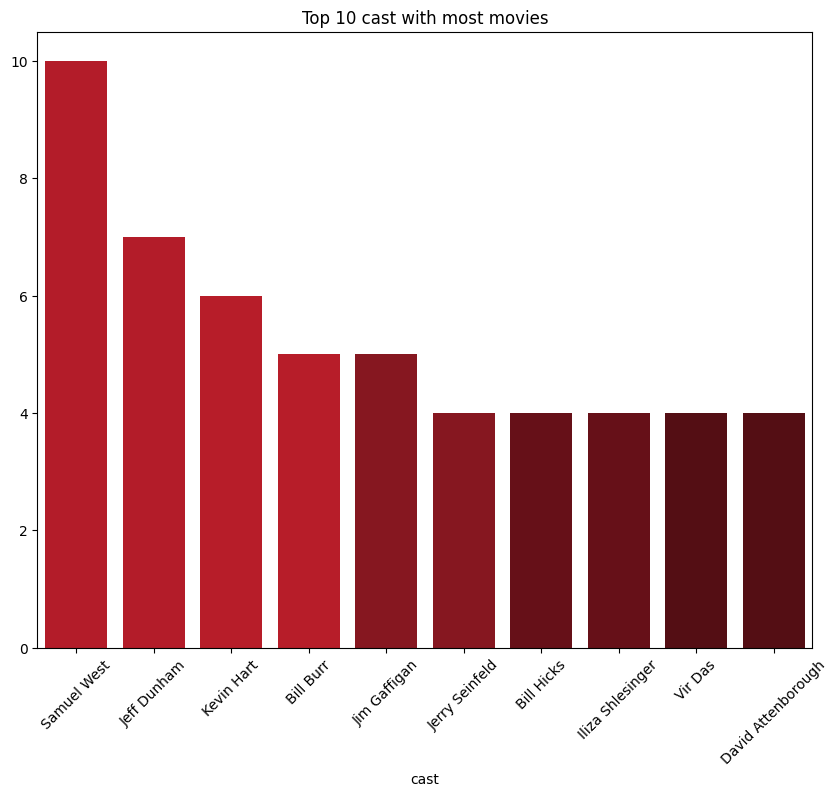

In [ ]:
top_casts=df.cast.value_counts().head(10)
plt.figure(figsize=(10,8))
plt.title("Top 10 cast with most movies")
sns.barplot(x=top_casts.index, y=top_casts.values, palette=['#CC0314','#CC0314','#D10314','#D10314','#990411','#990411','#74020C','#74020C', '#60020A','#60020A'])
plt.xticks(rotation=45)

plt.show()

Now, lets see what are the most common categories

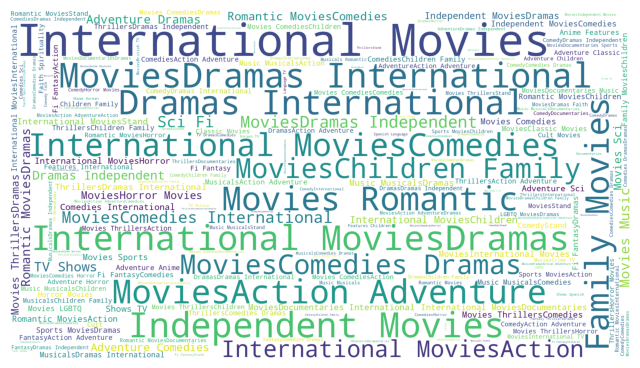

In [ ]:
plt.figure(figsize=(8,10))
wordcloud=WordCloud(
    background_color='white',
    height=1080,
    width=1920,
).generate(''.join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now, lets see contents vs country

In [ ]:
top_movies=df_movies.groupby('country')['type'].count().sort_values(ascending=False).head(10)
top_movies

,type
country,
United States,1819
India,868
United Kingdom,164
Canada,104
Egypt,90
Spain,84
Nigeria,84
Indonesia,76
Turkey,74


In [ ]:
top_shows=df_shows.groupby('country')['type'].count().sort_values(ascending=False).head(10)
top_shows

,type
country,
United States,27
United Kingdom,19
South Korea,10
Japan,10
India,7
Spain,7
Taiwan,7
France,5
Thailand,5


Now, lets visualise movies and Tv shows added to Netflix by top 10 countries

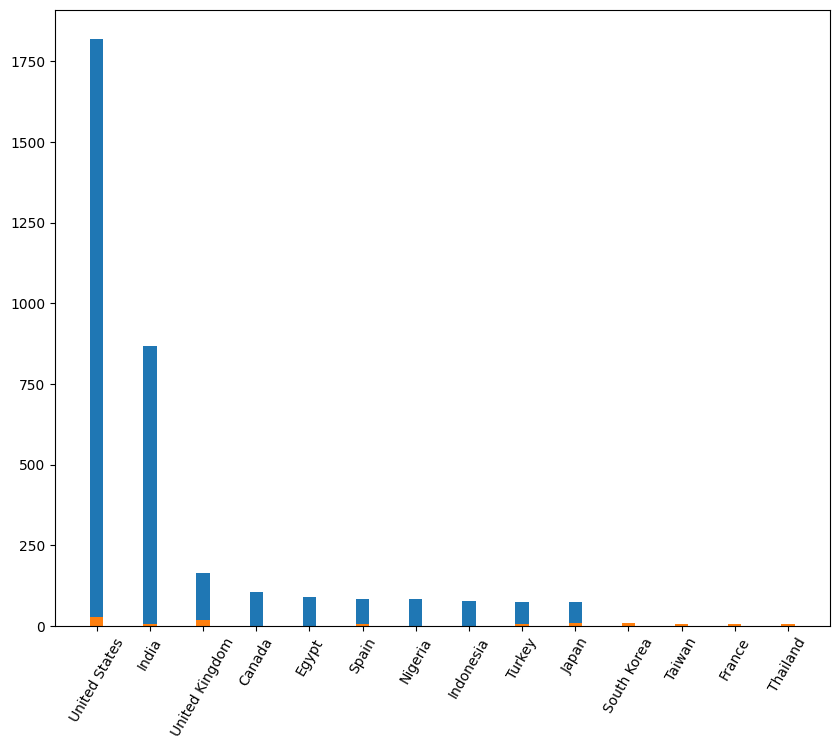

In [ ]:
bar_width=0.25
plt.figure(figsize=(10,8))
plt.bar(top_movies.index, top_movies.values, width=bar_width)
plt.bar(top_shows.index, top_shows.values, width=bar_width)
plt.xticks(rotation=60)
plt.show()

In [ ]:
top_shows.index

Index(['United States', 'United Kingdom', 'South Korea', 'Japan', 'India',
       'Spain', 'Taiwan', 'France', 'Thailand', 'Turkey'],
      dtype='object', name='country')

In [ ]:
top_contents=pd.merge(top_shows, top_movies, on='country')
top_contents.columns=['Tv Shows', 'Movies']
top_contents

,Tv Shows,Movies
country,,
United States,27,1819
United Kingdom,19,164
Japan,10,73
India,7,868
Spain,7,84
Turkey,5,74


<Figure size 1000x800 with 0 Axes>

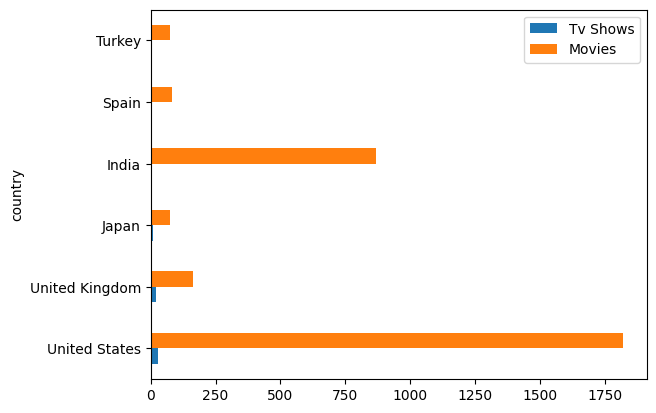

In [ ]:

plt.figure(figsize=(10,8))
top_contents.plot.barh()
plt.show()

In [ ]:
df_genre=df.copy()
df_genre['listed_in'] = df_genre['listed_in'].str.split(', ')
df_genre = df_genre.explode('listed_in').reset_index(drop=True)
df_genre

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-09-2021,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-09-2021,1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-09-2021,1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-09-2021,2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-09-2021,2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
11853,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-01-2020,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
11854,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-01-2020,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
11855,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-03-2019,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
11856,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-03-2019,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


[Text(0, 0, '2369'),
 Text(0, 0, '2293'),
 Text(0, 0, '1553'),
 Text(0, 0, '806'),
 Text(0, 0, '740'),
 Text(0, 0, '579'),
 Text(0, 0, '547'),
 Text(0, 0, '503'),
 Text(0, 0, '391'),
 Text(0, 0, '336')]

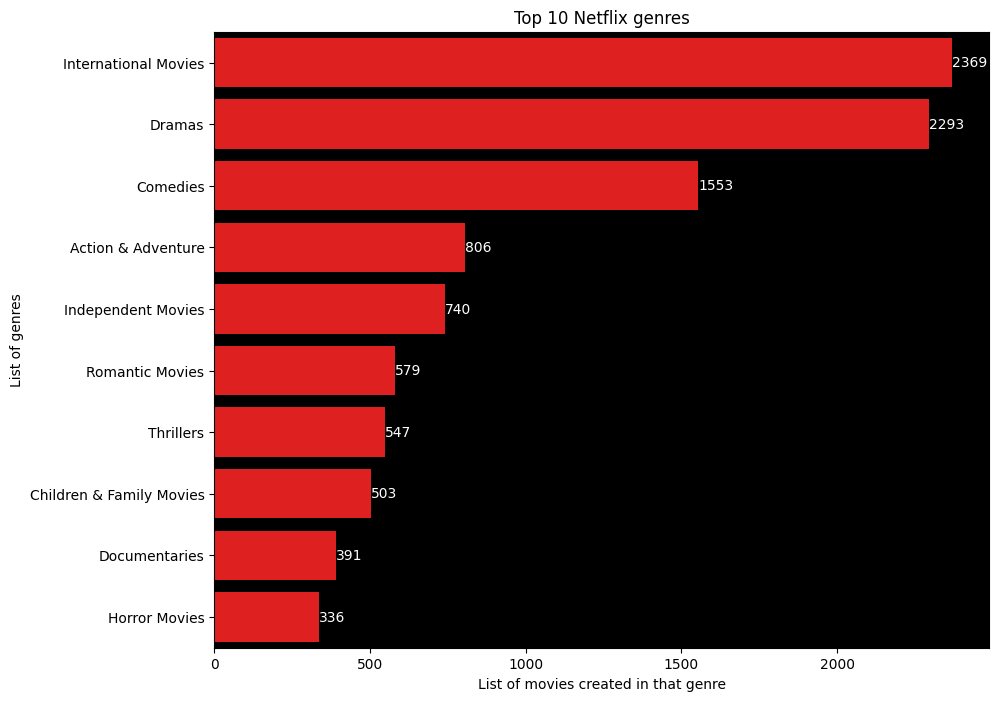

In [ ]:
v=[str(round(i/len(df_genre),2))+'%' for i in genres.sort_values(ascending=False)][:10]
v
fig, ax = plt.subplots(figsize=(10, 8))
genres=df_genre.groupby('listed_in').count()['show_id'].sort_values(ascending=True)
a=genres.tail(10).sort_values(ascending=False)
#plot.barh(a,genres_values20)
ax.set_facecolor('black')
plt.title("Top 10 Netflix genres")
plt.xlabel('List of movies created in that genre')
plt.ylabel('List of genres')
sns.barplot(x=a.values, y=a.index,  orient='h', color="red")

ax.bar_label(ax.containers[0], color="white")

Now let's analyse which genre is popular in which country

In [ ]:
df_genre_country=df_genre.copy()
df_genre_country['country'] = df_genre['country'].str.split(', ')
df_genre_country = df_genre_country.explode('country').reset_index(drop=True)
df_genre_country

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,24-09-2021,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
1,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Ghana,24-09-2021,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Burkina Faso,24-09-2021,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United Kingdom,24-09-2021,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",Germany,24-09-2021,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
15314,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-01-2020,2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
15315,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-01-2020,2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
15316,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-03-2019,2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
15317,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,02-03-2019,2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
b=df_genre_country.groupby(['country','listed_in']).show_id.count().sort_values()
b.tail(40)

,,show_id
country,listed_in,
Spain,Dramas,76
Turkey,International Movies,78
Indonesia,International Movies,78
Philippines,International Movies,78
Germany,Dramas,79
Canada,Dramas,81
Hong Kong,International Movies,81
United Kingdom,Action & Adventure,82
Germany,International Movies,83


Now lets visualise movie duration country wise

Now lets visualise movie duration genre wise

**End of the code**